<a href="https://colab.research.google.com/github/manasvigade/Adidas-Sales-Analysis/blob/main/Adidas_Sales_Analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file from your computer
uploaded = files.upload()

# Get the file name from uploaded dictionary
file_name = list(uploaded.keys())[0]

# Read Excel file
df = pd.read_excel(file_name)

# Preview
df.head()

Saving Adidas US Sales Datasets.xlsx to Adidas US Sales Datasets.xlsx


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
# Handling empty cells
print(df.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [26]:
# Summary Statistics (Sales & Profit)
print(df[['Total Sales', 'Operating Profit']].describe())
print("Average Total Sales: ", df['Total Sales'].mean())
print("Average Profit: ", df['Operating Profit'].mean())
print("Average Margin: ", df['Operating Margin'].mean()*100)

         Total Sales  Operating Profit
count    9648.000000       9648.000000
mean    93273.437500      34425.244761
std    141916.016727      54193.113713
min         0.000000          0.000000
25%      4254.500000       1921.752500
50%      9576.000000       4371.420000
75%    150000.000000      52062.500000
max    825000.000000     390000.000000
Average Total Sales:  93273.4375
Average Profit:  34425.244760572146


           Total Sales  Operating Profit
Region                                  
Midwest    135800459.0       52811346.48
South      144663181.0       61138004.07
Southeast  163171236.0       60555416.70
Northeast  186324067.0       68020587.65
West       269943182.0       89609406.55


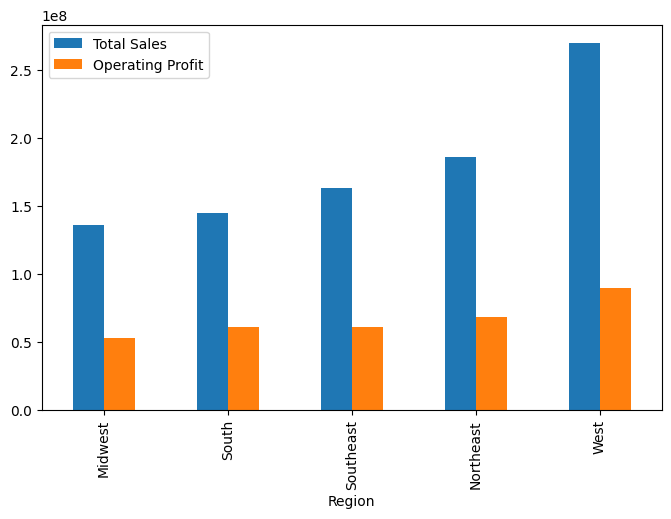

In [15]:
# By Region
# 1. Bar Chart
region_sales = df.groupby('Region')[['Total Sales', 'Operating Profit']].sum().sort_values('Total Sales', ascending=True)
print(region_sales)

# Visualization
region_sales.plot(kind='bar', figsize=(8,5))

plt.show()

                           Total Sales  Operating Profit
Product                                                 
Men's Street Footwear      208826244.0       82802260.62
Women's Apparel            179038860.0       68650970.56
Men's Athletic Footwear    153673680.0       51846888.19
Women's Street Footwear    128002813.0       45095826.81
Men's Apparel              123728632.0       44763030.33
Women's Athletic Footwear  106631896.0       38975784.94


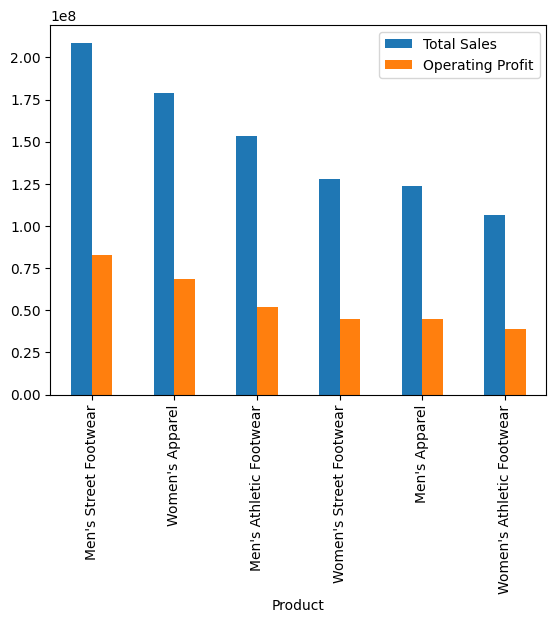

In [17]:
# 2. By Products
# Bar Chart
products = df.groupby('Product')[['Total Sales','Operating Profit']].sum().sort_values('Total Sales', ascending=False).head(10)
print(products)

products.plot(kind='bar')
plt.show()

              Total Sales  Operating Profit
Sales Method                               
In-store      356643750.0      1.275913e+08
Outlet        295585493.0      1.079883e+08
Online        247672882.0      9.655518e+07


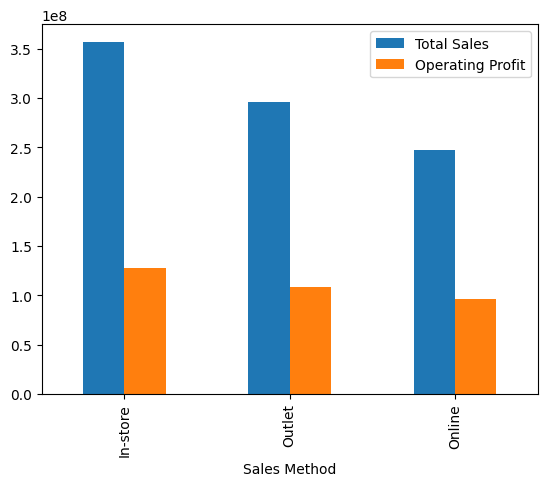

In [20]:
# 3. By Sales Method
Sales_Method = df.groupby('Sales Method')[['Total Sales','Operating Profit']].sum().sort_values('Total Sales', ascending=False)
print(Sales_Method)

Sales_Method.plot(kind='bar')
plt.show()

       Total Sales
Month             
1       71479142.0
2       61100153.0
3       56809109.0
4       72339970.0
5       80507695.0
6       74747372.0
7       95480694.0
8       92166201.0
9       77661459.0
10      63911033.0
11      67857340.0
12      85841957.0


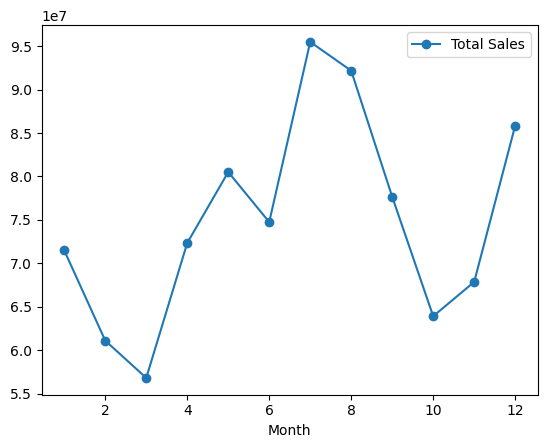

In [24]:
# 4. By Month (Seasonality)
# Line Chart
df['Month'] = df['Invoice Date'].dt.month
Monthly_Sales = df.groupby('Month')[['Total Sales']].sum()
print(Monthly_Sales)

Monthly_Sales.plot(kind = 'line', marker='o')
plt.show()

                  Price per Unit  Units Sold  Operating Profit
Price per Unit          1.000000    0.265869          0.394546
Units Sold              0.265869    1.000000          0.892379
Operating Profit        0.394546    0.892379          1.000000


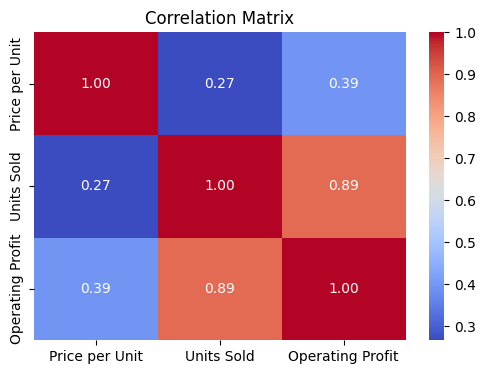

In [25]:
# 5. Correlation Analysis
# Correlation matrix
corr = df[['Price per Unit', 'Units Sold', 'Operating Profit']].corr()
print(corr)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
